#  ELEN4022 — Full Stack Quantum Computing — Lab 1 — Answers
## Mark Ambrose           student number: 1624498

Lets start by looking at the linear algebra required to compute the CNOT Ring


### Linear Algebra for Unitary of CNOT Ring

The image below shows how I have broken up the CNOT ring into two parts:
   1. concurrent CNOT gates on each increased qubits. $U_k$ 
        (This in turn has $U_1$ $U_2$ ... each U representing a CNOT over two bits)  
   2. A reverse CNOT ring From last to first qubit.Firstly. $U_N$

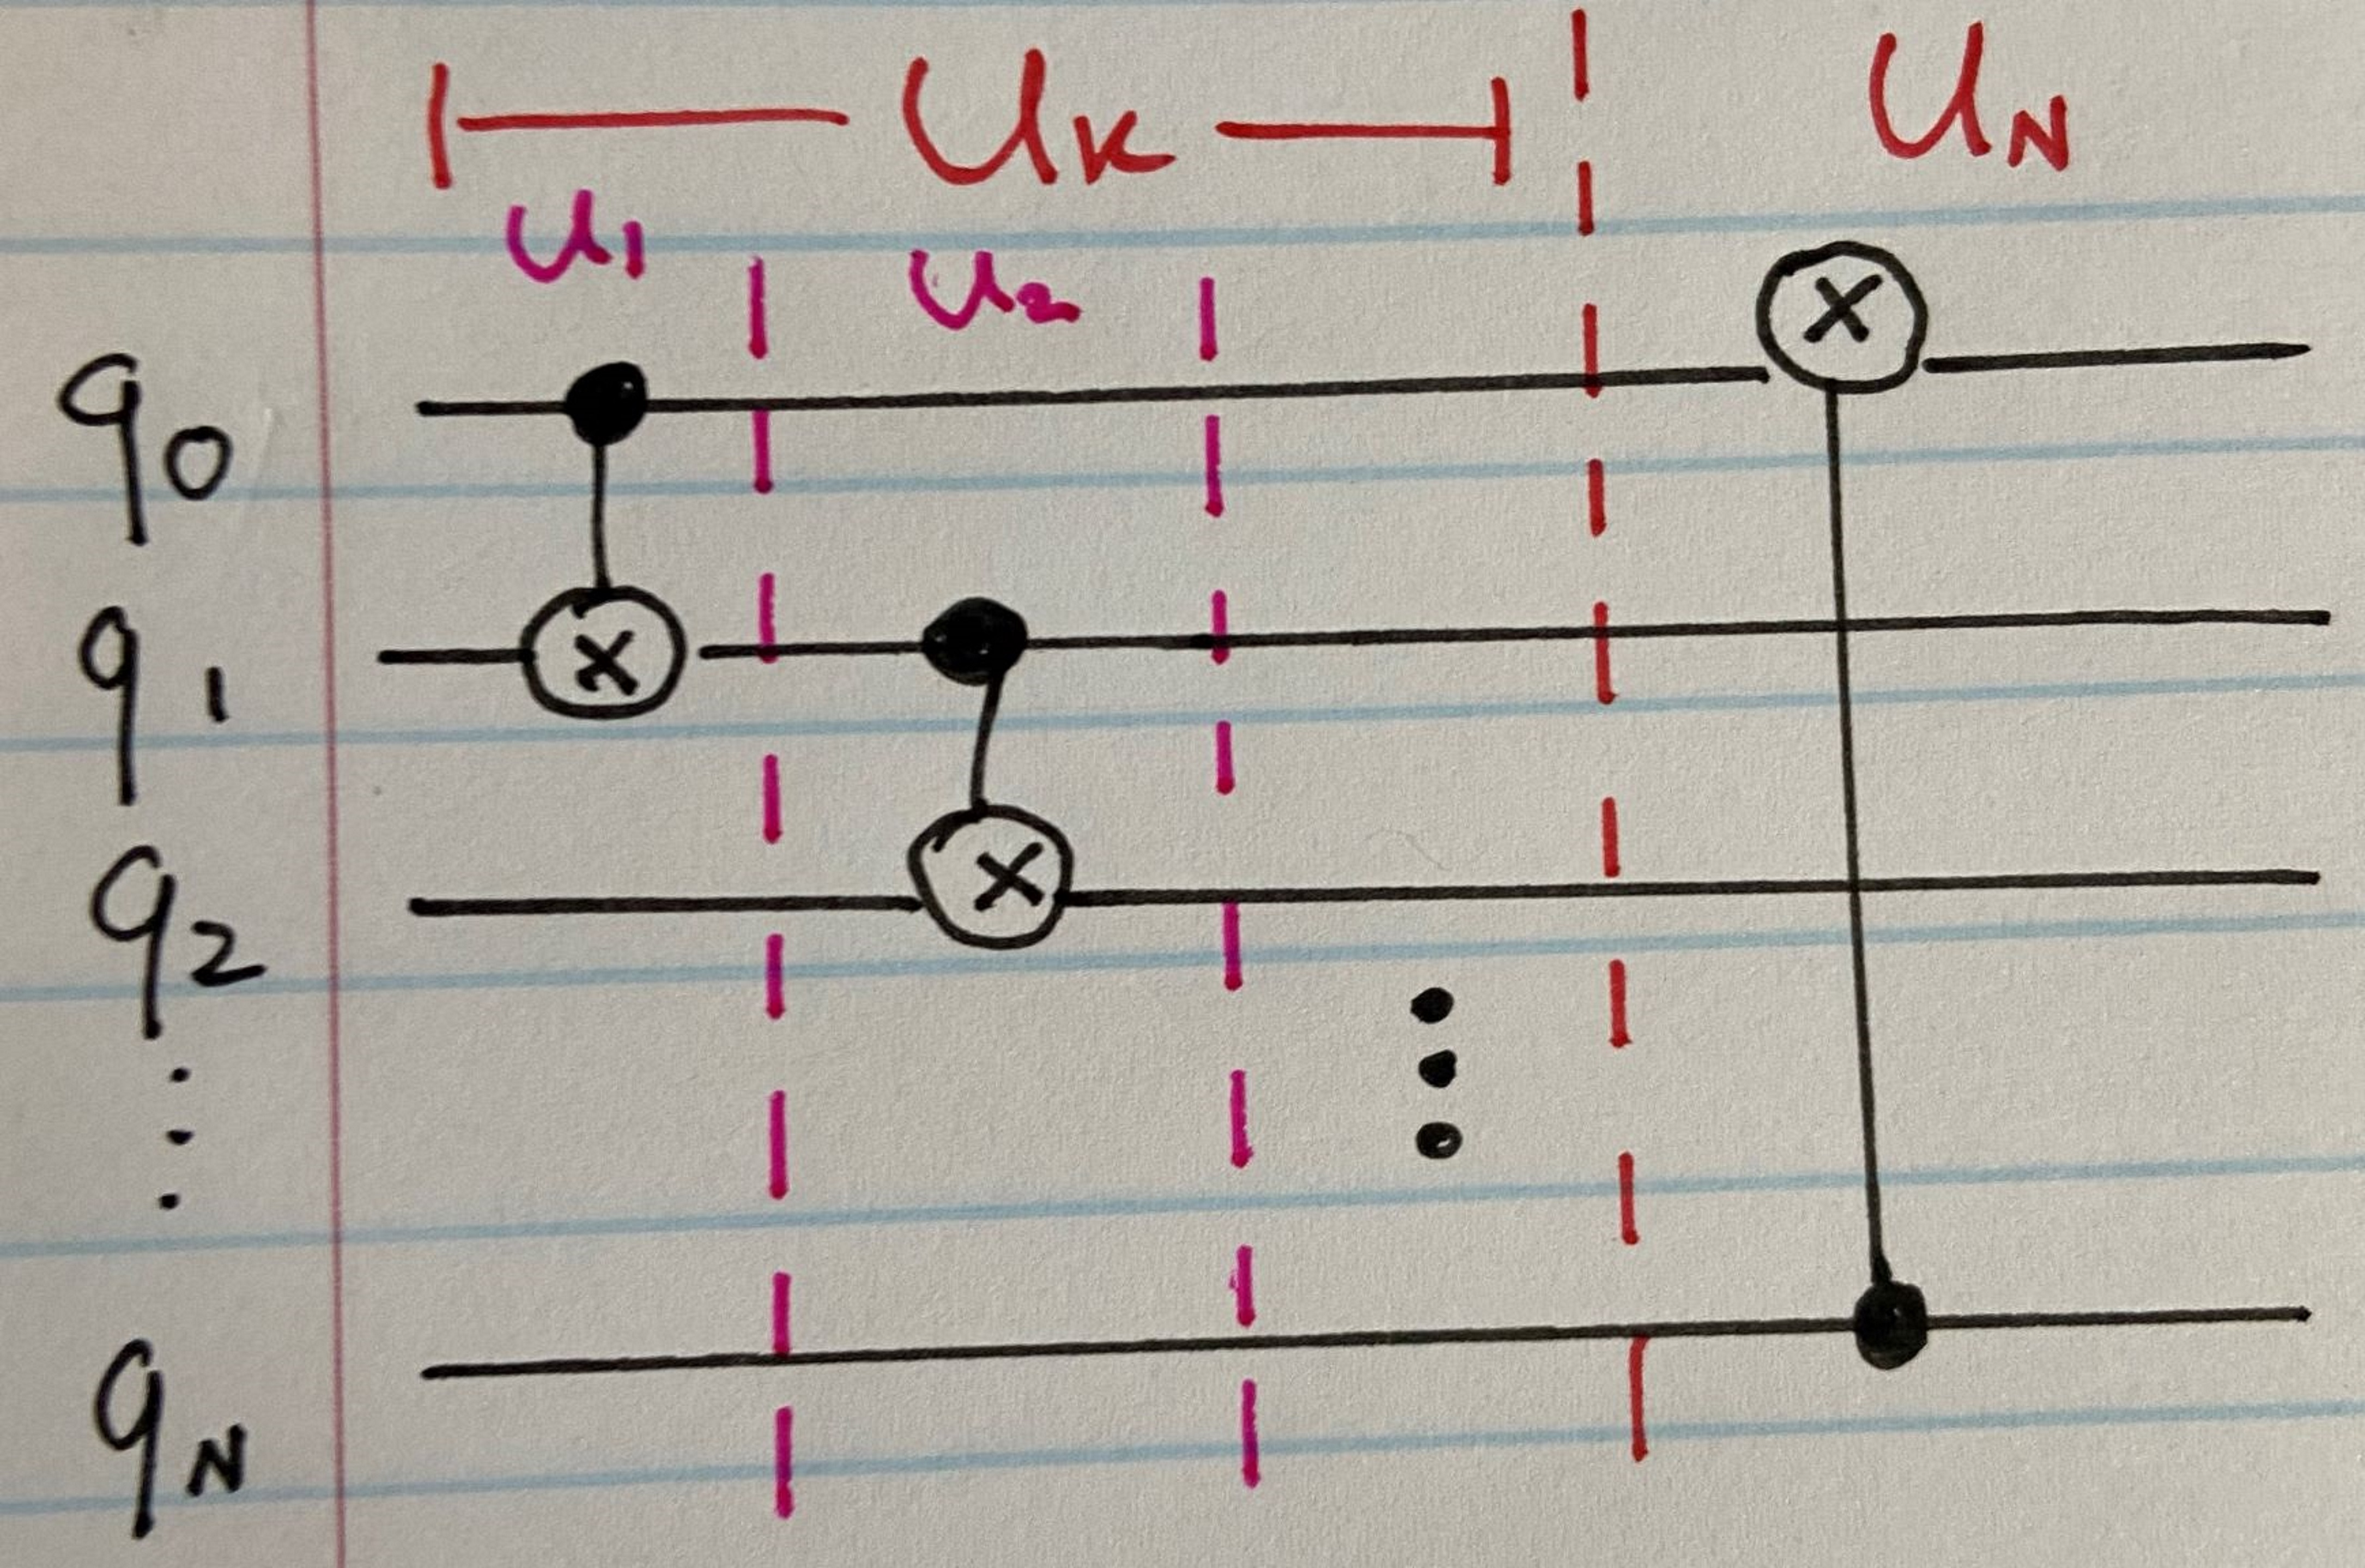

In [3]:
from IPython.display import Image
# Load image from local storage
Image(filename = "/Users/marks/OneDrive/Eng-Elec Wits 2021/Semester 1/ELEN4022 - Full Stack Quantum Computing/Lab 1 - CNOT RING/2021-Lab-1-1624498-Ambrose/CNOTRING.jpg", width = 400, height = 300)

#### 1. The general derived equation for concurrent CNOT gates. 

Note: require N $\geq$ 2  (CNOT is a two qubit operation, hence cannot do a CNOT on one qubit)

N = number  of qubits 


k = corresponding CNOT Gate/unitary (Each CNOT gate acts U as a block on the circuit. Where k is the select CNOT gate). 

let $U_k$ correspond to the CNOTS unitary up to and excluding the reverse CNOT.

The equation:
<br>
$$ U_k = \prod_{k=1}^{N-1} \bigotimes_{1}^{N-k-1} I_2\bigotimes CNOT \bigotimes_{1}^{k-1}I_2 $$
<br>
$$ CNOT = \begin{bmatrix}  1 & 0 & 0 & 0 \\ 
                           0 & 0 & 0 & 1 \\ 
                           0 & 0 & 1 & 0 \\ 
                           0 & 1 & 0 & 0  \end{bmatrix}$$ <br> $$\quad  I_2 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}   $$
                           
$U_k$ can be simplified further. The Kronecker product ,$\bigotimes$, on identity matrices yeilds another larger identity matrix of the relation:

$$\bigotimes_{1}^{p}=I_{2^p}   $$

Thus we can express $U_k$ as:

$$U_k = \prod_{k=1}^{N-1} I_{2^{n-k-1}} \bigotimes CNOT \bigotimes I_{2^{k-1}}  \quad\text{ -  Equation 1}$$


##### 2. Last CNOT  -- the reverse CNOT 

##### The basic equation is :  $$U_{N}=|0\rangle\langle0| \bigotimes_{1}^{N-1} I_2 + |1\rangle\langle1|\bigotimes_{1}^{N-2} I_2\bigotimes X $$
<br>
$U_N$ can be simplified using the same expression to simplify U_k:
<br>
$$U_N = |0\rangle\langle0|\bigotimes I_{2^{n-1}} + |1\rangle\langle1|\bigotimes I_{2^{n-2}} \bigotimes X   \quad\text{ -  Equation 2}$$
<br>
 $\quad$
<br>
$$X = Pauli X Gate =\begin{bmatrix}   0 & 1\\
                                      1 & 0 \end{bmatrix} $$
<br>                                            
$$|0\rangle\langle0|=\begin{bmatrix}1\\0\end{bmatrix}\begin{bmatrix}1&0\end{bmatrix} = \begin{bmatrix}1&0\\0&0\end{bmatrix}$$
<br>
$$|1\rangle\langle1|=\begin{bmatrix}0\\1\end{bmatrix}\begin{bmatrix}0&1\end{bmatrix} = \begin{bmatrix}0&0\\0&1\end{bmatrix}$$
<br>

##### 3. Hence, the single formula for CNOT ring:
<br>
$$ U_{CNOT RING, n} = \prod_{i=1}^{n} U_{n-i+1} $$
<br>
$$ U_{n-i+1} = U_{N}U_{k} $$
<br>
$$ n = number of qubits $$
<br>
$$ if N = 5: U_{CNOT Ring, 5} = U_{5}U_{4}U_{3}U_{2}U_{1} $$
<br>

### Now that we have the formula:
1. Lets create necessary functions 
2. Lets calculate the ring algebraically and store in U_alg for N = 5 qubits
3. Then lets simulate on qiskit and store in U_sim for N = 5 qubits
4. Compare the results
5. Repeat step 1 to 4 for 10 qubits

## 1. Create the Functions

In [22]:
# import all the libraries
from qiskit import QuantumCircuit, Aer, assemble, transpile, IBMQ
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex

# initialize all variables
CNOT = np.array([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]]) 
X = np.array([[0,1],[1,0]]) # Pauli X Gate
I = np.array([[1,0],[0,1]]) # Identity Matrix
oneone = np.array([[0,0],[0,1]])  # |1><1|  outer product 
zerozero = np.array([[1,0],[0,0]])  # |0><0|

Create CNOT ring function for any number of qubits N

In [18]:
def CNOT_RING(N):
    qc = QuantumCircuit(N)     # create a quantum circuit
    for it in range(0,N-1):    # put CNOT on all qubits
        qc.cx(it,it+1)
    qc.cx(N-1,0)               # put a reverse CNOT on last to first qubit
    return qc        

Create a function to compute the Unitary (U) mathematically of CNOT Ring

In [19]:
def CNOT_ALGO_FUN(N):  # N = number qubits
    # find Uk
    Uk = np.identity(np.power(2,N))
    for k in range (1,N):
        A = np.identity(np.power(2,N-k-1))
        B = np.identity(np.power(2,k-1))
        temp = np.kron(A,np.kron(CNOT,B))
        Uk = np.matmul(temp,Uk)

    # find Un
    C = np.identity(np.power(2,N-1))
    D = np.identity(np.power(2,N-2))
    Un = np.kron(zerozero,C) + np.kron(oneone, np.kron(D,X))

    # find U
    U = np.matmul(Un,Uk)
    return U

##  N = 5 Qubits/Wires
### 2. Algebraic Calculation for Unitary 

Lets find the 5 qubits/wires CNOT
$$ N = 5 $$

1. lets find the concurrent CNOT (exlcuding the reverse CNOT) $U_k$ :
<br>
$$ U_k = \prod_{k=1}^{4} \bigotimes_{1}^{4-k} I_2\bigotimes CNOT \bigotimes \bigotimes_{1}^{k-1}I_2$$
<br>
$$ (k=1): U_1 = \bigotimes_{1}^{3} I_2\bigotimes CNOT  \bigotimes\bigotimes_{1}^{0}I_2 = I_2 \bigotimes I_2 \bigotimes I_2\bigotimes CNOT$$
<br>
$$ (k=2): U_2 = \bigotimes_{1}^{2} I_2\bigotimes CNOT  \bigotimes\bigotimes_{1}^{1}I_2 =  I_2 \bigotimes I_2\bigotimes CNOT   \bigotimes I_2 $$
<br>
$$ (k=3): U_3 = \bigotimes_{1}^{1} I_2\bigotimes CNOT  \bigotimes\bigotimes_{1}^{2}I_2 = I_2\bigotimes CNOT\bigotimes I_2 \bigotimes I_2 $$
<br>
$$ (k=4): U_4 = \bigotimes_{1}^{0} I_2\bigotimes CNOT  \bigotimes \bigotimes_{1}^{3}I_2 =  CNOT\bigotimes I_2 \bigotimes I_2 \bigotimes I_2$$
<br>
$$ U_k = U_4U_3U_2U_1 $$
<br>
2. Lets find the reverse CNOT $U_5$
<br>
$$ U_5 =|0\rangle\langle0| \bigotimes_{1}^{4} I_2 + X\bigotimes_{1}^{3} I_2\bigotimes|1\rangle\langle1|  
\\ = |0\rangle\langle0|\bigotimes I_2\bigotimes I_2\bigotimes I_2\bigotimes I_2 + |1\rangle\langle1| \bigotimes I_2\bigotimes I_2\bigotimes I_2\bigotimes X    $$
<br>
3. U of the entire circuit:
$$ U_{CNOT Ring, 5} = U_{5}U_{k} = U_{5}U_{4}U_{3}U_{2}U_{1} $$
<br>

In [20]:
# lets prove the above using code
# 1. We can code manually the steps
# 2. We can find a function to compute a CNOT

# find the unitaries (each CNOT is its own U_i) manually
U1 = np.kron(I,np.kron(I,np.kron(I,CNOT)))   # using numpy kronecker product
U2 = np.kron(I,np.kron(I,np.kron(CNOT,I)))
U3 = np.kron(I,np.kron(CNOT,np.kron(I,I)))
U4 = np.kron(CNOT,np.kron(I,np.kron(I,I))) 
U5 = np.kron(zerozero,np.kron(I,np.kron(I,np.kron(I,I)))) + np.kron(oneone,np.kron(np.kron(I,np.kron(I,I)),X))
U_alg = np.matmul(U5,np.matmul(U4,np.matmul(U3,np.matmul(U2,U1))))

# lets use the function now

In [21]:
U = CNOT_ALGO_FUN(5)

if (np.array_equal(U_alg,U)):
    print("The function is correct as it matches mechanical calculations")
else:
    print("function is incorrect")

The function is correct as it matches mechanical calculations


### 3. Qiskit Simulation for Unitary

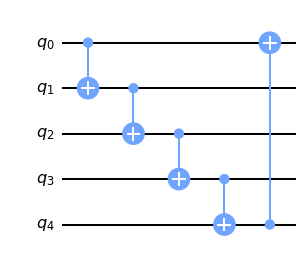

In [27]:
qc1 = CNOT_RING(5)
qc1.draw(output='mpl')

In [11]:
usim = Aer.get_backend('unitary_simulator')          # use a backend to simulate the ideal quantum circuit to find the unitary
qobj = assemble(qc1)                                 # assemble or put the circuit together
U_sim = usim.run(qobj).result().get_unitary()        # now simulate
#array_to_latex(U_sim, pretext="\\text{unitary} = ") # print the unitary aesthetically 

## 4. Compare Results

Now we could compare both matrices visually. But the dimensions of U growth with the number of qubits is exponential:
$$ dimension U = 2^N $$
Hence, for a 10 qubit CNOT Ring:$$ dimension U = 2^5 = 32 $$Hence, Unitary will be 32x32 in dimensions... too long to print. Using Numpy array_equal can see if two matrices elements are the same

In [ ]:
if (np.array_equal(U,U_sim)):
    print("The two arrays are equal (the math checks out)")
else:
    print("the two arrays are NOT equal")

## 5. N = 10 (10 wires)
we will not show algebraically how to do it but rather plug in the values needed

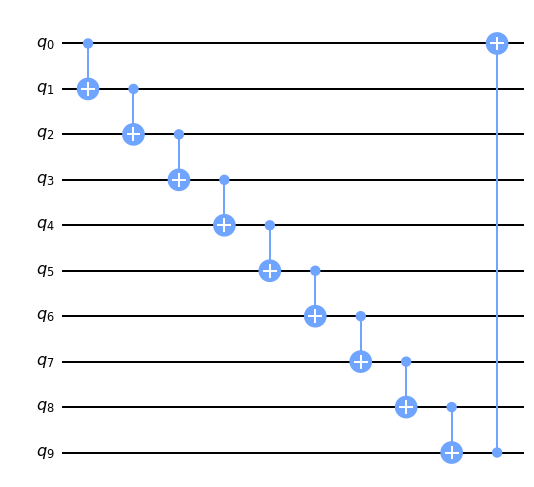

In [24]:
U_10 = CNOT_ALGO_FUN(10)
qc2 = CNOT_RING(10)
qc2.draw(output='mpl')

In [9]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc2) 
U_sim_10 = usim.run(qobj).result().get_unitary() 

if (np.array_equal(U_10,U_sim_10)):
    print("The two arrays are equal (the math checks out)")
else:
    print("the two arrays are NOT equal")

The two arrays are equal (the math checks out)
